# The Curse of Dimensionality

## Random Projections
First, let's investigate the orthogonality of random vectors

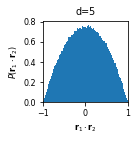

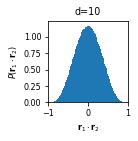

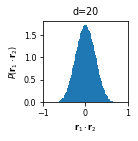

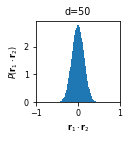

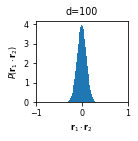

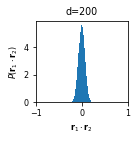

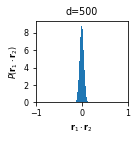

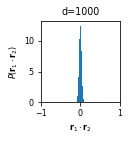

In [15]:
import numpy as np
import mnist
from matplotlib import pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations
from sklearn.preprocessing import normalize

mpl.rcParams['figure.figsize'] = [2, 2] # inches
mpl.rcParams['font.size'] = 8

d = [5,10,20,50,100,200,500,1000]
for n in d:
    # each row of R is normalised
    R = normalize(np.random.randn(100000,n), axis=1)
    plt.figure()
    ax = plt.axes()
    plt.hist(R[np.tril_indices_from(R)], bins=100, density=True)
    plt.xlabel(r'$\mathbf{r}_1\cdot \mathbf{r}_2$')
    plt.ylabel(r'$P(\mathbf{r}_1\cdot \mathbf{r}_2)$')
    plt.title(r'd='+str(n))
    ax.set_xlim(-1,1)
    plt.tight_layout()
    plt.savefig('../figures/classification/random-histogram-d'+str(n)+'.pdf')

## Implications for MNIST
First, let's compute the pairwise distance for MNIST and plot them 

In [16]:
import mnist
train_set = mnist.train_images()
train_labels = mnist.train_labels()
test_set = mnist.test_images()
test_labels = mnist.test_labels()
# Vectorise
test_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in test_set]))
train_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in train_set]))
# Compute distances from each element of test set to each element of training set
distances = []
for i in test_set[0:1000]:
    distances.append([np.linalg.norm(i-j) for j in train_set[0:1000]])
distances = np.squeeze(np.array(distances).reshape((1,-1)))

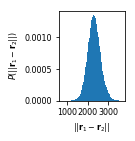

In [17]:
plt.figure()
ax = plt.axes()
plt.hist(distances, bins=100, density=True)
plt.xlabel(r'$||\mathbf{r}_1 - \mathbf{r}_2||$')
plt.ylabel(r'$P(||\mathbf{r}_1 - \mathbf{r}_2||)$')
plt.tight_layout()
plt.savefig('../figures/classification/mnist-distances.pdf')

In [18]:
print(np.mean(distances))
print(np.median(distances))
print(np.std(distances))

2317.615555729267
2310.4212819310656
312.9277896507789


## Dimensionality reduction
First, we demonstrate that there are redundant dimensions in the image data. We compute the map of the variance over the dataset

In [19]:
np.sum(train_set[0:1000])

25637533

In [20]:
image_cube = mnist.train_images()[0:1000]
std_image = np.std(image_cube, axis=0)
mean_image = np.mean(image_cube, axis=0)

175
0.22321428571428573


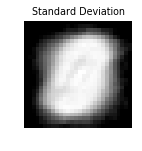

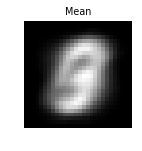

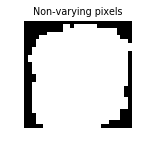

In [21]:
# Display mean and stdev images
plt.figure()
plt.imshow(std_image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.title('Standard Deviation')
plt.savefig('../figures/classification/mnist-std.pdf')
plt.figure()
plt.imshow(mean_image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.title('Mean')
plt.savefig('../figures/classification/mnist-mean.pdf')
# Image of zero variance pixels
plt.figure()
plt.imshow(std_image!=0, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.title('Non-varying pixels')
plt.savefig('../figures/classification/mnist-non-varying.pdf')
# Proportion of non-varying pixels
print(np.sum(std_image==0))
print(np.sum(std_image==0)/784)

In [22]:
# Reverse sort the variance
image_std = np.sort(np.squeeze(std_image.reshape((1,-1))))[::-1]
cum_std = np.cumsum(image_std)

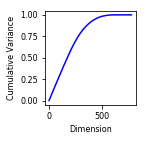

In [23]:
plt.figure()
plt.plot(cum_std/max(cum_std),'b-')
plt.xlabel('Dimension')
plt.ylabel('Cumulative Variance')
plt.tight_layout()
plt.savefig('../figures/classification/mnist-cumstd.pdf')

Repeat the histogram calculations after random projection

In [24]:
R = normalize(np.random.randn(40,784), axis=1)
rtest = np.matmul(R,test_set[0:1000].T).T
rtrain = np.matmul(R, train_set[0:1000].T).T
distances = []
for i in rtest[0:1000]:
    distances.append([np.linalg.norm(i-j) for j in rtrain[0:1000]])
distances = np.squeeze(np.array(distances).reshape((1,-1)))

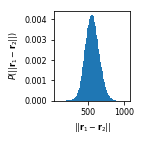

In [25]:
plt.figure()
ax = plt.axes()
plt.hist(distances, bins=100, density=True)
plt.xlabel(r'$||\mathbf{r}_1 - \mathbf{r}_2||$')
plt.ylabel(r'$P(||\mathbf{r}_1 - \mathbf{r}_2||)$')
plt.tight_layout()
plt.savefig('../figures/classification/rp-mnist-distances.pdf')

In [26]:
print(np.mean(distances))
print(np.median(distances))
print(np.std(distances))

561.5651325673916
559.5024958905888
95.74473935920858
